In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

import tensorflow as tf

## 1. 단순 선형 회귀모델의 비용 구하기

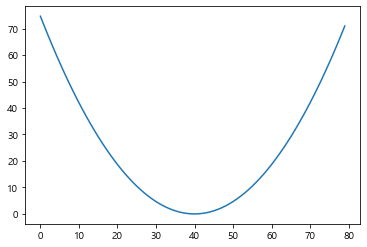

In [3]:
##### 데이터 준비
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.placeholder(tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

#----------------- 텐서플로의 그래프 완성 -------------------#

##### 비용함수를 가지고 그래프를 그려보기
sess = tf.Session()
cost_val = []

for i in range(-30, 50):
    result = sess.run(cost, feed_dict={W:i*0.1})
    cost_val.append(result)
    
plt.plot(cost_val)
sess.close()

## 2. 경사하강 알고리즘을 이용한 가중치 학습

In [10]:
##### 데이터 준비
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot-y_train)*x_train)
learning_rate = 0.1
descent = W - (learning_rate * gradient)
update = W.assign(descent)

################## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    _, weight, c = sess.run([update, W, cost])
    print(step, weight, c)

sess.close()

0 [0.27586097] 14.645836
1 [0.716216] 4.1927357
2 [0.95107204] 1.2194095
3 [1.0763285] 0.37366343
4 [1.1431321] 0.13309582
5 [1.1787606] 0.06466757
6 [1.1977625] 0.04520355
7 [1.2078968] 0.039667137
8 [1.2133018] 0.03809234
9 [1.2161844] 0.0376444
10 [1.2177218] 0.037516978
11 [1.2185419] 0.037480723
12 [1.2189791] 0.037470426
13 [1.2192123] 0.03746749
14 [1.2193367] 0.037466656
15 [1.219403] 0.037466418
16 [1.2194384] 0.03746635
17 [1.2194574] 0.03746632
18 [1.2194674] 0.03746633
19 [1.2194728] 0.03746633


In [12]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot-y_train)*x_train)
learning_rate = 0.01
descent = W - (learning_rate * gradient)
update = W.assign(descent)

################## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    _, weight, c = sess.run([update, W, cost], feed_dict={x_train:[1, 2, 3, 4, 5], 
                                                          y_train:[1, 2, 3, 4, 5]})
    print(step, weight, c)

sess.close()

0 [0.20633665] 12.806427
1 [0.31169778] 10.157667
2 [0.40546918] 8.059584
3 [0.48892573] 6.3976927
4 [0.5632021] 5.081309
5 [0.629308] 4.0386004
6 [0.68814224] 3.2126718
7 [0.74050474] 2.5584538
8 [0.7871074] 2.0402474
9 [0.8285838] 1.629776
10 [0.8654977] 1.3046412
11 [0.89835113] 1.0471027
12 [0.92759067] 0.84310615
13 [0.9536139] 0.68152034
14 [0.9767745] 0.55352825
15 [0.99738747] 0.45214587
16 [1.015733] 0.3718408
17 [1.0320605] 0.30823126
18 [1.046592] 0.25784612
19 [1.059525] 0.21793607


#### 1) 경사 하강 알고리즘 객체 사용

In [39]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

################## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    _, weight, c, bias = sess.run([update, W, cost, b], feed_dict={x_train:[1, 2, 3, 4, 5], 
                                                          y_train:[2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0:
        print(step, weight, c, bias)


0 [0.28346822] 18.880089 [0.08433424]
100 [1.1498294] 0.05362155 [0.5590683]
200 [1.1067863] 0.027238036 [0.71446794]
300 [1.0761085] 0.013836039 [0.82522416]
400 [1.0542439] 0.0070282533 [0.90416217]
500 [1.0386606] 0.0035701215 [0.9604227]
600 [1.0275542] 0.0018135123 [1.0005206]
700 [1.0196383] 0.0009212078 [1.0290991]
800 [1.0139966] 0.00046794157 [1.0494677]
900 [1.0099754] 0.00023769704 [1.0639848]
1000 [1.0071098] 0.000120743585 [1.0743313]
1100 [1.0050673] 6.133607e-05 [1.081705]
1200 [1.0036116] 3.115635e-05 [1.086961]
1300 [1.002574] 1.5825924e-05 [1.090707]
1400 [1.0018346] 8.039186e-06 [1.0933765]
1500 [1.0013076] 4.0839504e-06 [1.0952793]
1600 [1.000932] 2.0748303e-06 [1.0966351]
1700 [1.0006644] 1.0541992e-06 [1.0976015]
1800 [1.0004735] 5.3563923e-07 [1.0982903]
1900 [1.0003376] 2.7214963e-07 [1.0987811]


In [40]:
##### Testing

print(sess.run(hypot, feed_dict={x_train:[27]}))
print(sess.run(hypot, feed_dict={x_train:[2.5, 3.7]}))

[28.105652]
[3.599732 4.800022]


In [41]:
sess.close()

## 3. 응용 예제

+ 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측하시오.

In [42]:
X = [1, 2, 3, 4, 5, 6, 7]
y = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

In [53]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

################## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    _, c = sess.run([update, cost], feed_dict={x_train:X, y_train:y})
    
    if step % 100 == 0:
        print(step, c)


0 13454615000.0
100 9834326.0
200 9188806.0
300 8890047.0
400 8751783.0
500 8687786.0
600 8658156.0
700 8644457.0
800 8638122.0
900 8635182.0
1000 8633825.0
1100 8633198.0
1200 8632910.0
1300 8632769.0
1400 8632706.0
1500 8632674.0
1600 8632659.0
1700 8632660.0
1800 8632654.0
1900 8632652.0


In [54]:
print(sess.run(hypot, feed_dict={x_train:[8]}))

[206570.42]


## 4. 다중 선형 회귀모델

In [55]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

#### 1) 단순하게 처리하는 경우

In [ ]:
X1 = tf.placeholder(tf.float32, shape=[None])
X2 = tf.placeholder(tf.float32, shape=[None])
X3 = tf.placeholder(tf.float32, shape=[None])

y = tf.placeholder(tf.float32, shape=[None])

##### 가설 설정


##### 비용 함수


##### 최소 비용 계산